# <a id='toc1_'></a>[Table of contents](#toc0_)

<a id='toc0_'></a>    
- [Table of contents](#toc1_)    
- [Data Preprocessing](#toc2_)    
  - [Checking data](#toc2_1_)    
  - [Remapping boolean columns and processing CGPA, handling inconsistency](#toc2_2_)    
- [Analysis](#toc3_)    
  - [🌟 Exercise 1 : Visualizing the Distribution of CGPA](#toc3_1_)    
  - [🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders](#toc3_2_)    
  - [🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks](#toc3_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Preprocessing](#toc0_)

In [9]:
!kaggle datasets download -d shariful07/student-mental-health -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/shariful07/student-mental-health
License(s): CC0-1.0




  0%|          | 0.00/1.62k [00:00<?, ?B/s]
100%|██████████| 1.62k/1.62k [00:00<00:00, 1.54MB/s]


In [10]:
import pandas as pd

df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## <a id='toc2_1_'></a>[Checking data](#toc0_)

In [11]:
df['Choose your gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['Age'].describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

In [13]:
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [14]:
df['Age'].describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

## <a id='toc2_2_'></a>[Remapping boolean columns and processing CGPA, handling inconsistency](#toc0_)

In [22]:
boolean_columns = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?', 'Marital status']

df[boolean_columns] = df[boolean_columns].replace({'Yes': 1, 'No': 0})


cgpa_mapping = {
    '3.50 - 4.00': 3.75,
    '3.00 - 3.49': 3.245,
    '2.50 - 2.99': 2.745,
    '2.00 - 2.49': 2.245,
    '1.50 - 1.99': 1.745,
    '1.00 - 1.49': 1.245,
    '0.00 - 0.99': 0.495
}

df['CGPA_mean'] = df['What is your CGPA?'].map(cgpa_mapping)

df['Your current year of Study'] = df['Your current year of Study'].str.lower()




In [23]:
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

# <a id='toc3_'></a>[Analysis](#toc0_)

## <a id='toc3_1_'></a>[🌟 Exercise 1 : Visualizing the Distribution of CGPA](#toc0_)
Objective:  
Create a histogram to visualize the distribution of students’ CGPA.  

Dataset Overview: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.  

Tasks:  

Import necessary libraries.  
Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).  
Use Seaborn’s histplot to create a histogram of the CGPA categories.  
Customize the histogram with an appropriate color and add a title.  
Display the plot.  

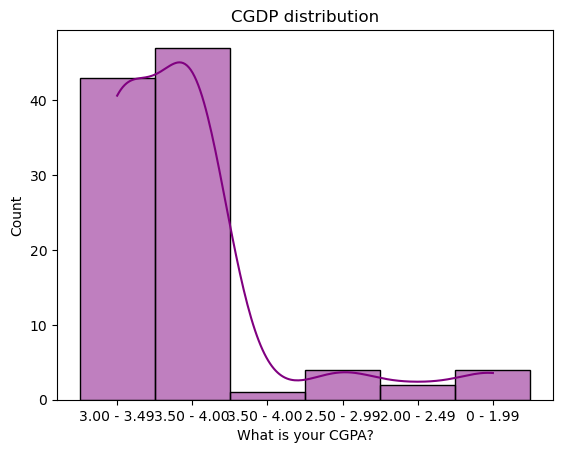

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('CGDP distribution')
sns.histplot(df['What is your CGPA?'], kde=True, color='purple')
plt.show()

## <a id='toc3_2_'></a>[🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders](#toc0_)
Objective:  
Use a bar plot to compare the proportion of students experiencing anxiety across different genders.  

Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.  

Tasks:  

Import necessary libraries.  
Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.  
Customize your plot with an appropriate color palette.  
Add a title to your plot.  
Display the plot.  

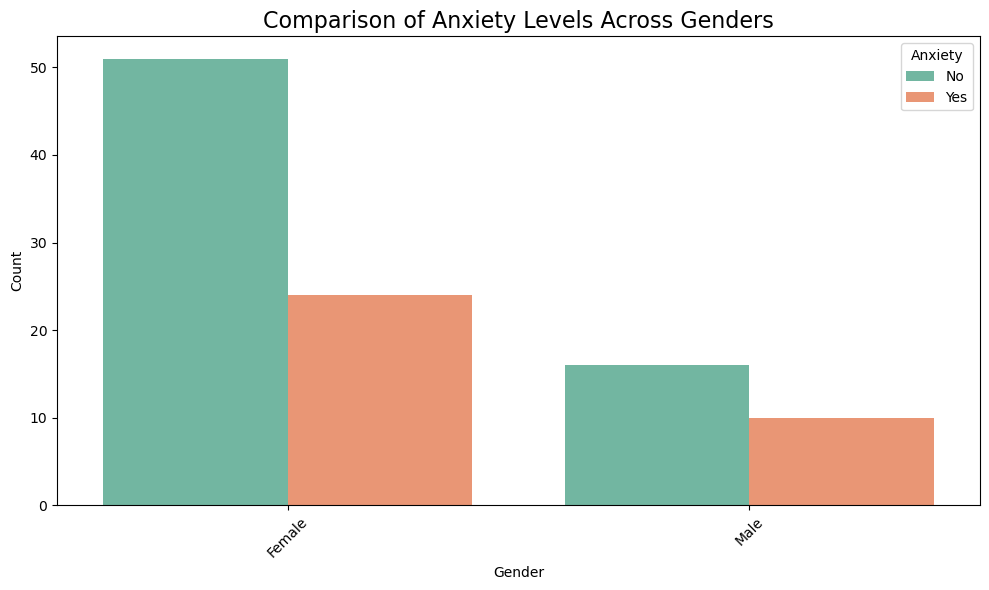

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Choose your gender', hue='Do you have Anxiety?', palette='Set2')
plt.title('Comparison of Anxiety Levels Across Genders', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Anxiety')
plt.tight_layout()

# Show the plot
plt.show()


## <a id='toc3_3_'></a>[🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks](#toc0_)
Objective:  
Create a scatter plot to explore if there’s any visible relationship between students’ age and the occurrence of panic attacks.  

Dataset Overview: The dataset records students’ ages and their responses to whether they have experienced panic attacks.  

Tasks:  

Import necessary libraries.  
Use Seaborn’s scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).  
Customize the scatter plot to improve readability.  
Add a title.  
Display the plot.  

In [18]:
age_panic_counts = df.groupby(['Age', 'Panic_attack_numeric']).size().reset_index(name='counts')

KeyError: 'Panic_attack_numeric'

In [17]:
# Create the updated scatter plot with circles instead of crosses

plt.figure(figsize=(8, 6))
sns.scatterplot(data=age_panic_counts, x='Age', y='Panic_attack_numeric', size='counts', sizes=(50, 400),
                hue='Panic_attack_numeric', palette='mako', legend='brief', alpha=0.7, marker='o')

# Adjust labels, titles, and ticks
plt.title('Relationship Between Age and Panic Attacks (Size represents occurrences)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Panic Attack (Yes=1, No=0)')
plt.yticks([0, 1], ['No', 'Yes'])

# Show the legend
plt.legend(title="Panic Attack", loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


NameError: name 'age_panic_counts' is not defined

<Figure size 800x600 with 0 Axes>